# Computer Vision

* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* https://www.learnpytorch.io/03_pytorch_computer_vision/


## 0. Computer Vision libraries in PyTorch

* `torchvision` https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` get datasets and data loading functions for a Computer vision
* `torchvision.models` get pre-trained Computer vision models taht you leverage for your own problem
* `torchvision.transforms` functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torchvision.utils.data.Dataset` Base dataset class for PyTorch
* `torchvision.utils.data.DataLoader` Create a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)


2.4.0+cu124
0.19.0+cu124


### 1. Getting a dataset
the dataset we'll use is FashionMNIST from torchvision.datasets  https://github.com/zalandoresearch/fashion-mnist




In [2]:
# setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to store it
    train = True, # do we want training datasets?
    download=True,
    transform=ToTensor(), # how do we want to transform the data
    target_transform= None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our image
print(f"Image shape: {image.shape} -> color channel, height and width")
print(f"Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> color channel, height and width
Label: Ankle boot


### 1.2 Visualize our data

Image shape : torch.Size([1, 28, 28])


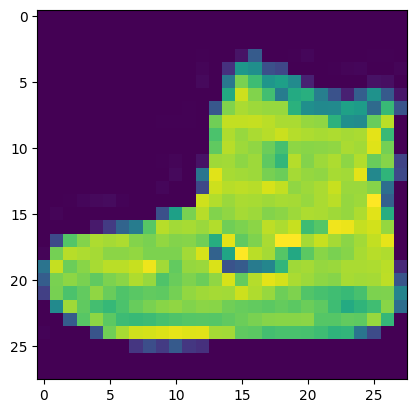

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze());

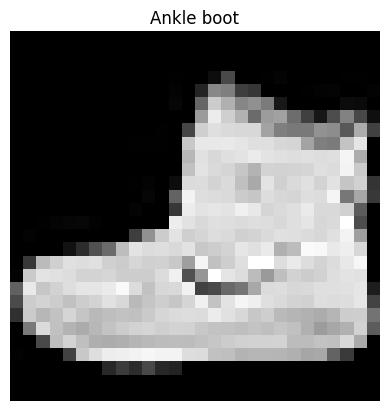

In [10]:

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

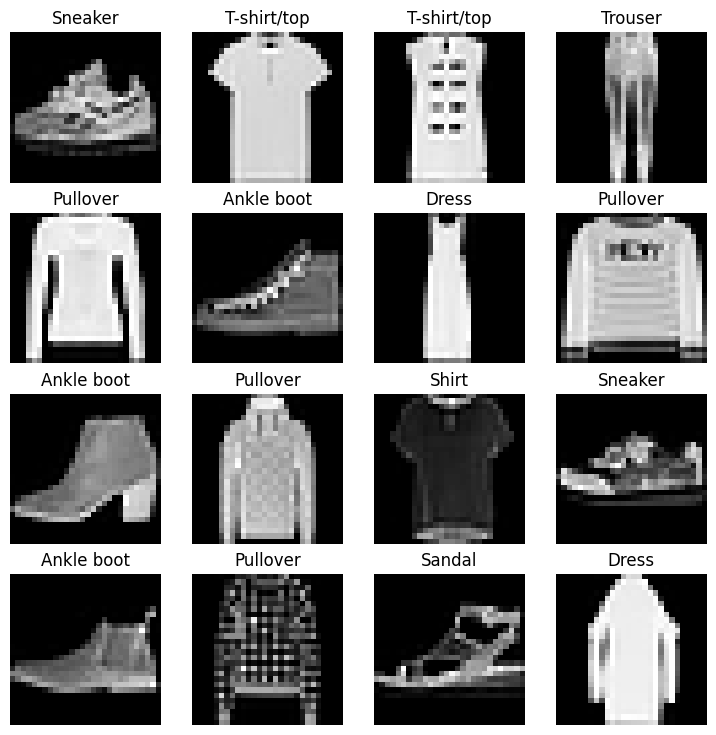

In [18]:
# Plot more images 
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    #print(random_idx)


## 2. Prepare DataLoader
rigth now, our data in is the form of PyTorch Datasets.

DataLoader turns our datasets into a Python iterable. 

More specification, we want to turn our data into batches

why?

* It is more computer efficient, it would consume a lot of memory to run all data at once 
* It gives our NN more changes to update its gradient descent 

https://www.youtube.com/watch?v=4qJaSmvhxi8&ab_channel=DeepLearningAI

In [19]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

#
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1803e5842f0>,
 <torch.utils.data.dataloader.DataLoader at 0x1803ed015b0>)

In [20]:
# Let's check out what we've created

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of :{BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of :{BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001803E5842F0>, <torch.utils.data.dataloader.DataLoader object at 0x000001803ED015B0>)
Lenght of train_dataloader: 1875 batches of :32
Lenght of test_dataloader: 313 batches of :32


In [21]:
# Check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

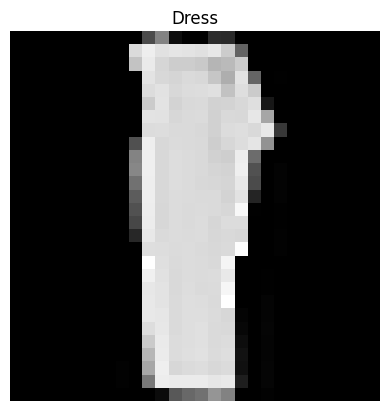

In [29]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)


## 3. Model 0: Build a baseline model

when starting a build a series of machine learning modeling, it's best to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiment

in other words: start simply and add complexity when necessary

In [32]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(x.shape)

# Flatten the sample
output = flatten_model(x) # perform forward pass
print("Shape after flattening")
print(output.shape)

torch.Size([1, 28, 28])
Shape after flattening
torch.Size([1, 784])


In [33]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                    input_shape: int,
                    hidden_units: int,
                    output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                       out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)




In [41]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 28 * 28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [36]:
dummy_x = torch.rand([1,1,28, 28])
print(dummy_x.shape)
dummy_x

torch.Size([1, 1, 28, 28])


tensor([[[[0.0945, 0.5863, 0.8351, 0.8303, 0.9971, 0.8183, 0.7233, 0.1926,
           0.9927, 0.2787, 0.8215, 0.7057, 0.2036, 0.4553, 0.4584, 0.8775,
           0.8826, 0.6072, 0.2159, 0.6424, 0.9097, 0.2350, 0.9007, 0.6130,
           0.7766, 0.6715, 0.8157, 0.0746],
          [0.7065, 0.0664, 0.4659, 0.8910, 0.0900, 0.1197, 0.2809, 0.5188,
           0.4309, 0.1075, 0.5651, 0.3744, 0.2665, 0.5055, 0.6698, 0.5802,
           0.1685, 0.8389, 0.5943, 0.2953, 0.9328, 0.6008, 0.7600, 0.8535,
           0.4911, 0.9121, 0.4978, 0.9000],
          [0.5606, 0.7301, 0.7518, 0.2229, 0.9369, 0.5152, 0.6838, 0.1311,
           0.3134, 0.8259, 0.1844, 0.5693, 0.9391, 0.0251, 0.4945, 0.5812,
           0.8277, 0.3320, 0.0113, 0.1905, 0.6501, 0.1318, 0.0720, 0.4874,
           0.6312, 0.1865, 0.3058, 0.7735],
          [0.1619, 0.0887, 0.3489, 0.9017, 0.3534, 0.1611, 0.1453, 0.3825,
           0.8551, 0.6879, 0.3331, 0.0662, 0.1966, 0.6056, 0.9204, 0.7575,
           0.4361, 0.7652, 0.5360, 0.5687, 

In [37]:
model_0(dummy_x)

tensor([[-0.1680,  0.2322,  0.2701,  0.0274,  0.6386,  0.3092,  0.3212,  0.2810,
         -0.1581, -0.1608]], grad_fn=<AddmmBackward0>)

In [38]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* loss function : `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD`
* Evaluate metric: for classification let's use accuracy

In [42]:
# Import accuracy metric

from helper_functions import accuracy_fn

# Setup loss function

loss_fn = nn.CrossEntropyLoss()

# Setup optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments 

Machine learning is very experimental.

Two main things you'll often want to track:
* Model's performance
* How fast it runs

In [44]:
from timeit import default_timer as timer 
def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    """Print difference betweem start and end time."""
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [48]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.989999484270811e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through test batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all 

In [53]:
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
# Set the number of epochs (we'll keep this small for faster training time)

epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred =  model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero glad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by lenght of dataloader as the accumulated loss is very high, we need an average instead
    train_loss /= len(train_dataloader)

    # Testing

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. test loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. test accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the accuracy per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening 

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
tota_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test accuracy: 82.0387
Epoch: 1
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test accuracy: 83.1969
Epoch: 2
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test accuracy: 83.4265
Train time on cpu: 20.656 seconds


'cpu'